In [84]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import os
import cv2
from scipy import optimize

base_dir = 'D:\\Data\\Dispertech\\2020-02-28'

C:\Users\aquic\.conda\envs\DispertPy\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\aquic\.conda\envs\DispertPy\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\aquic\.conda\envs\DispertPy\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [82]:
def gaussian(height, center_x, center_y, width_x, width_y):
    """Returns a gaussian function with the given parameters"""
    width_x = float(width_x)
    width_y = float(width_y)
    return lambda x,y: height*np.exp(
                -(((center_x-x)/width_x)**2+((center_y-y)/width_y)**2)/2)

def moments(data):
    """Returns (height, x, y, width_x, width_y)
    the gaussian parameters of a 2D distribution by calculating its
    moments """
    total = data.sum()
    X, Y = np.indices(data.shape)
    x = (X*data).sum()/total
    y = (Y*data).sum()/total
    col = data[:, int(y)]
    width_x = np.sqrt(np.abs((np.arange(col.size)-y)**2*col).sum()/col.sum())
    row = data[int(x), :]
    width_y = np.sqrt(np.abs((np.arange(row.size)-x)**2*row).sum()/row.sum())
    height = data.max()
    return height, x, y, width_x, width_y

def fitgaussian(data):
    """Returns (height, x, y, width_x, width_y)
    the gaussian parameters of a 2D distribution found by a fit"""
    params = moments(data)
    errorfunction = lambda p: np.ravel(gaussian(*p)(*np.indices(data.shape)) -
                                 data)
    p, success = optimize.leastsq(errorfunction, params)
    return p

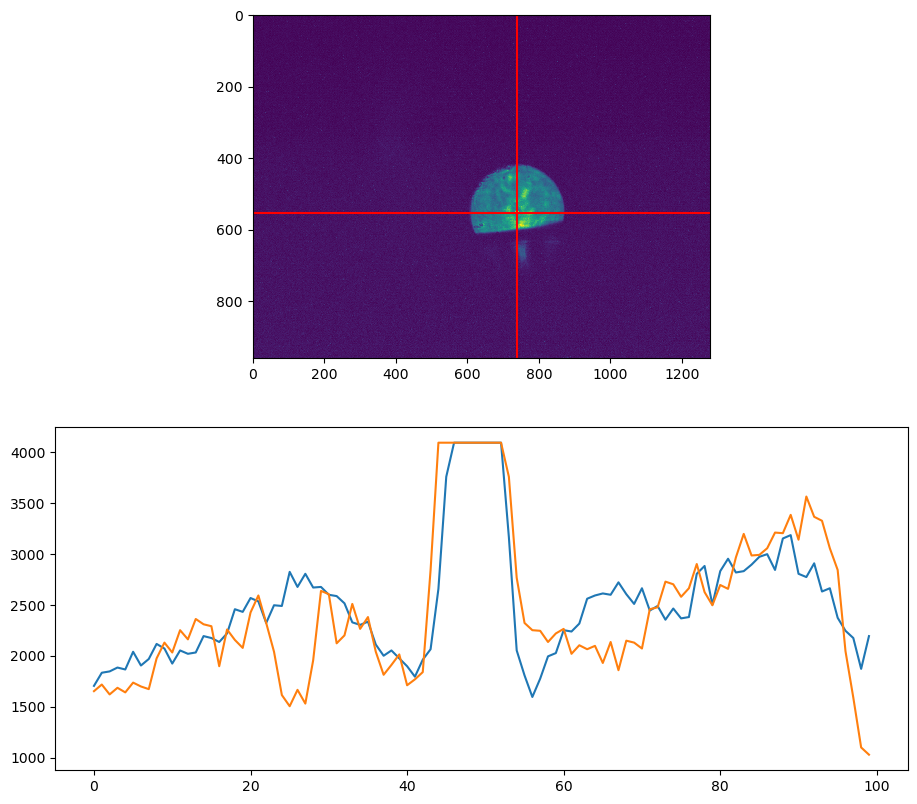

In [91]:
file = "fiber_end_1902019_0.npy"
filename = os.path.join(base_dir,file)
data = np.load(os.path.join(base_dir, filename))
fig, ax = plt.subplots(2, figsize=(11,10), dpi=100)
fig.set()
y = 553
x = 739
ax[0].imshow(data.T)
ax[0].axhline(y=y,color='red')
ax[0].axvline(x=x,color='red')
ax[1].plot(data[x-50:x+50,y])
ax[1].plot(data[x,y-50:y+50])

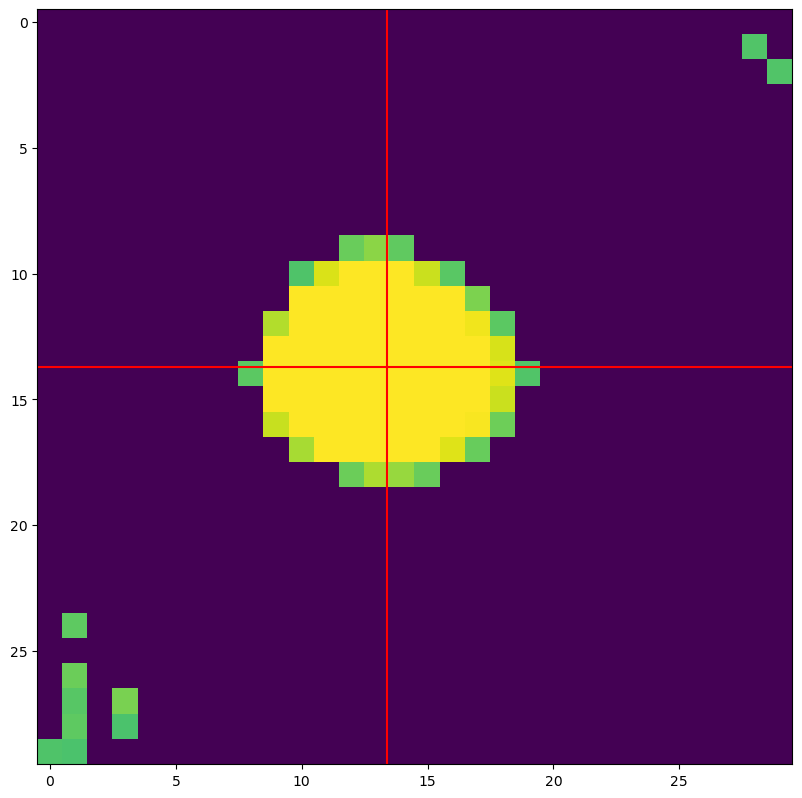

In [94]:
cropped_data = np.copy(data[x-15:x+15, y-15:y+15])
cropped_data[cropped_data<np.mean(cropped_data)+np.std(cropped_data)] = 0
p = fitgaussian(cropped_data)
fig, ax = plt.subplots(1, figsize=(11,10), dpi=100)
fig.set()
ax.imshow(cropped_data)
ax.axhline(y=p[1],color='red')
ax.axvline(x=p[2],color='red')

array([5.82893297e+03, 1.37243642e+01, 1.33762791e+01, 2.97537057e+00,
       3.26548684e+00])

In [63]:
circles

array([[[45., 55., 37.]]], dtype=float32)